<a href="https://colab.research.google.com/github/Pm55155/AI-ML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**
**Customer Behavior Analysis & Prediction System**
#                                                                                **Business Problem**
A wholesale distributor wants to understand customer purchasing behavior and
1. Predict whether a customer belongs to the **Hotel** or **Retall** segment.
2. Identify hidden customer segments for targeted marketing.




# **Project Tasks**

**Part A- Data Understanding**





In [5]:
#1. Load the dataset and display basic information
#uploading csv in google colab
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving Wholesale customers data.csv.xlsx to Wholesale customers data.csv.xlsx


In [6]:
df = pd.read_excel('Wholesale customers data.csv.xlsx')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# 2. identify:
         

*   Features
*   Target variable


In [7]:
x=df.drop('Channel',axis=1)
y=df['Channel']

print("Features:\n",x.columns)
print("Target variable",y.name)

Features:
 Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')
Target variable Channel


3. Explain the diffrenece between **supervised** and **unsupervised** learning using this dataset

SUPERVISED LEARNING:
- Uses labeled data
- Here: 'Channel' column (Hotel / Retail)
- Task: Predict whether customer is Hotel or Retail

UNSUPERVISED LEARNING:
- No target variable
- Uses only purchasing behavior
- Task: Identify hidden customer segments using clustering

### **Part B- Data Preprocessing & Features Engineering**

4. Create at least **3 new meaningful features** from existing columns

In [8]:

df["Total_Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + \
                    df["Frozen"] + df["Detergents_Paper"] + df["Delicassen"]


df["Fresh_Ratio"] = df["Fresh"] / df["Total_Spend"]


df["Grocery_Milk_Ratio"] = df["Grocery"] / df["Milk"]

df.head()




,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Fresh_Ratio,Grocery_Milk_Ratio
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.783036
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.975331
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.872389
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,3.529264
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,1.330499


5. Perfrom:
         



*   outiler detection
*   Scaling of numerical
*   Encoding if required



In [9]:
#outiler detection
Q1=df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers=((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)))
outliers.sum()

,0
Channel,0
Region,0
Fresh,20
Milk,28
Grocery,24
Frozen,43
Detergents_Paper,30
Delicassen,27
Total_Spend,20
Fresh_Ratio,0


In [10]:
# Scaling of Numerical Features

from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include='number').columns
num_cols

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Fresh_Ratio,Grocery_Milk_Ratio
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649,-0.014611,-0.540702
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514,-0.657045,-0.440835
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535,-0.812784,-0.494298
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026,0.441494,0.885531
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011,0.466117,-0.256381


In [11]:
#Encoding if required

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Channel'] = le.fit_transform(df['Channel'])
df["Region"] = le.fit_transform(df["Region"])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Fresh_Ratio,Grocery_Milk_Ratio
0,1,2,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649,-0.014611,-0.540702
1,1,2,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514,-0.657045,-0.440835
2,1,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535,-0.812784,-0.494298
3,0,2,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026,0.441494,0.885531
4,1,2,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011,0.466117,-0.256381


6. Analyze multicolinearity using correlation

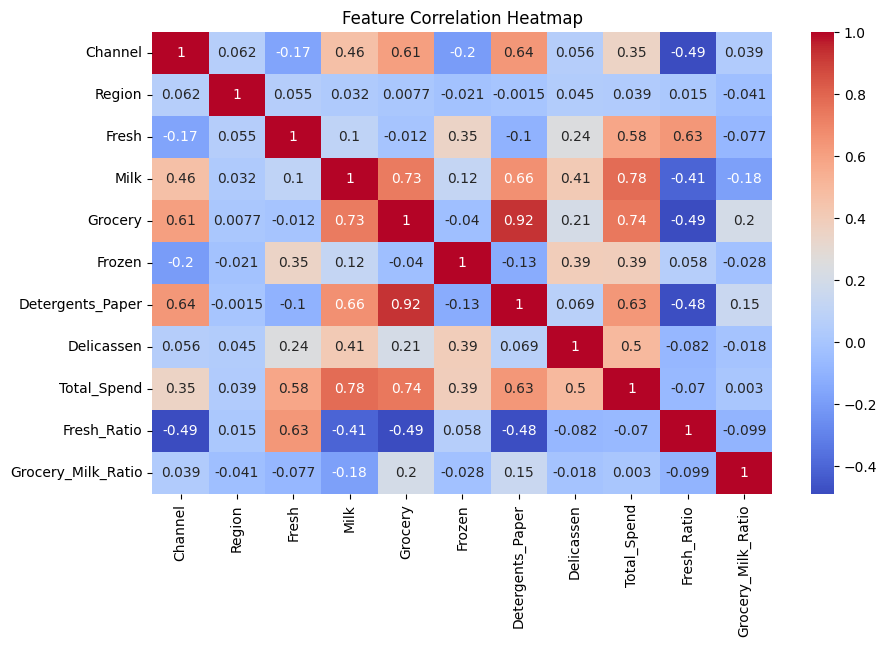

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') # Corrected df_cleaned to df
plt.title("Feature Correlation Heatmap")
plt.show()

## **Part c-Regression Analysis**

7. Create a new target variable Total_spend


In [13]:
df["Total_Spend"] = (df["Fresh"] + df["Milk"] + df["Grocery"] + \
                    df["Frozen"] + df["Detergents_Paper"] + df["Delicassen"]
)
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Fresh_Ratio,Grocery_Milk_Ratio
0,1,2,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.163889,-0.014611,-0.540702
1,1,2,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.228896,-0.657045,-0.440835
2,1,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2.172340,-0.812784,-0.494298
3,0,2,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.634918,0.441494,0.885531
4,1,2,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1.949775,0.466117,-0.256381


8. Build:


*   Linear Regression model
*   Multiple Regression model



In [15]:
#Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Added import statement
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr = LogisticRegression(max_iter=1000)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

9.Evaluate using:


*   MAE
*   RMSE
*   R square 2 score






In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

y_pred_lr = lr.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_lr)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))
r2=r2_score(y_test,y_pred_lr)

print("MAE:",mae)
print("RMSE:",rmse)
print("R2:",r2)

MAE: 0.07954545454545454
RMSE: 0.2820380374088831
R2: 0.5879598662207357


In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

# Train & evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)[:, 1]

    results.append([
        name,
        accuracy_score(y_test, preds),
        precision_score(y_test, preds),
        recall_score(y_test, preds),
        f1_score(y_test, preds),
        roc_auc_score(y_test, probs)
    ])

# Results DataFrame
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]
)

results_df


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.920455,0.953125,0.938462,0.945736,0.953177
1,SVM,0.909091,0.983051,0.892308,0.935484,0.966555
2,Decision Tree,0.875000,0.950000,0.876923,0.912000,0.873244
3,Random Forest,0.897727,0.966667,0.892308,0.928000,0.965552
4,Gradient Boosting,0.909091,0.967213,0.907692,0.936508,0.946488


10. Apply **Ridge or Lasso** and compare performance

In [24]:
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)

lasso=Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)

print("Ridge r2", r2_score(y_test,ridge_pred))
print("Lasso r2", r2_score(y_test,lasso_pred))

Ridge r2 0.48579007327433754
Lasso r2 0.4895229672711172


# **Part D-classification Modeling**

11.Predict **Customer** Channel using:

*   Logistic Regression
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   Gradient Boosting
12. compare models using:


*   Accuracy
*   Precision
*   Recall
*   F1-Score
*   ROC-AUC Curve








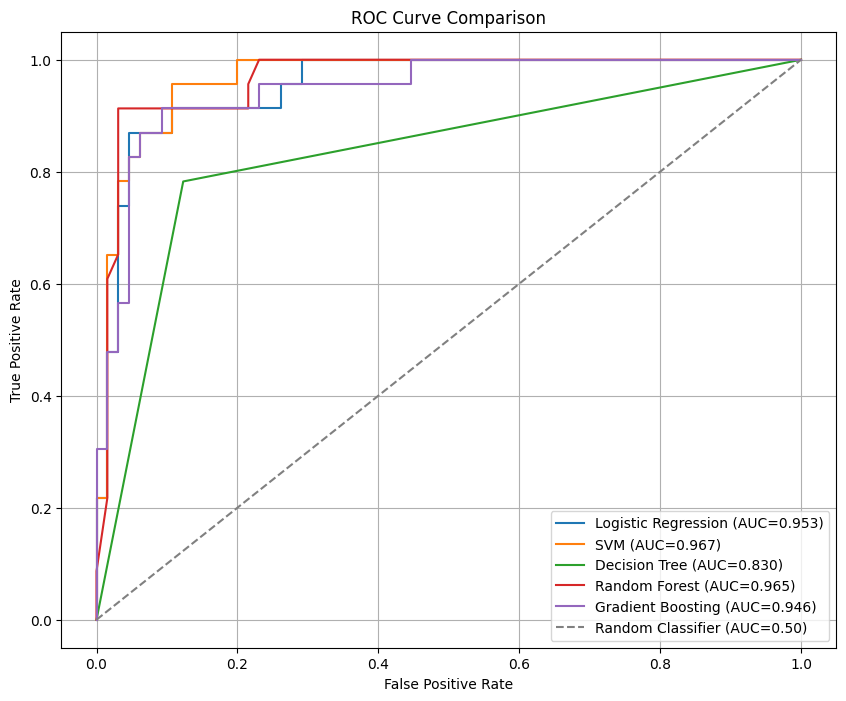

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Increased max_iter for convergence
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

plt.figure(figsize=(10,8)) # Create a single figure for all plots

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    # Ensure y_test values are 0 or 1 for roc_curve if they are 1 or 2
    # Assuming y_test might have values other than 0/1 from previous transformations
    # If y_test is 1 and 2, and pos_label is not handled explicitly, it may raise ValueError
    # For consistency with sklearn's roc_curve, transform y_test to 0/1 if it's 1/2
    if set(y_test.unique()) == {1, 2}: # Check if labels are 1 and 2
        y_test_binary = y_test.apply(lambda x: 1 if x == 2 else 0) # Map 2 to 1 (positive), 1 to 0 (negative)
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
        roc_auc = auc(fpr, tpr)
    else:
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0) # Add zero_division to handle cases with no positive predictions
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append([name, acc, prec, rec, f1, roc_auc])

    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

# Plot the random classifier baseline outside the loop
plt.plot([0,1], [0,1], linestyle="--", color='gray', label='Random Classifier (AUC=0.50)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.grid(True)
plt.show() # Display the single combined plot after all curves are drawn

# **Part E-Unsupervised Learning**

13.Apply **k-Means Clustering** to segment customers

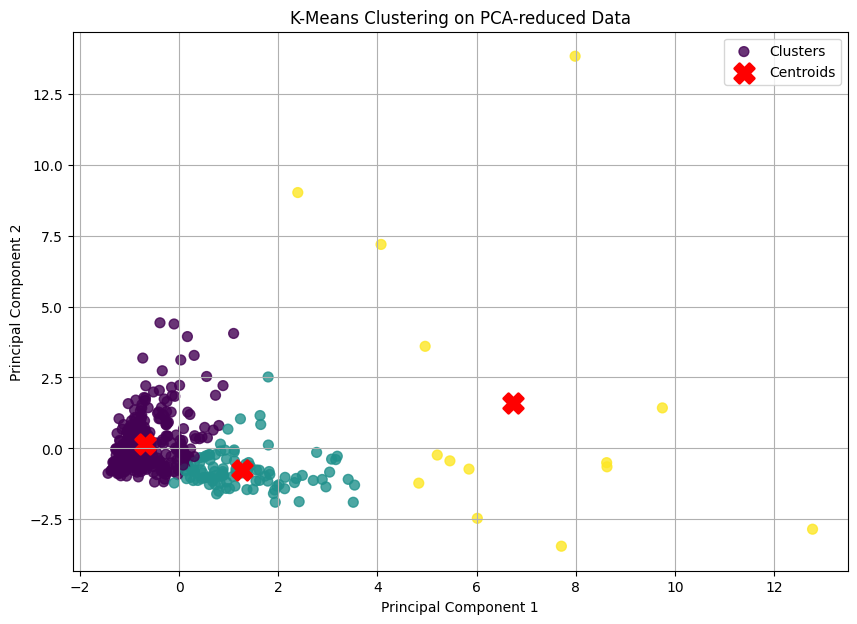

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features_for_clustering = df.drop(columns=['Channel', 'Total_Spend', 'Fresh_Ratio', 'Grocery_Milk_Ratio'], errors='ignore')


pca = PCA(n_components=2)
x_reduced = pca.fit_transform(features_for_clustering)


kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(x_reduced)
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=labels, cmap='viridis', alpha=0.8, s=50, label='Clusters')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=200, color='red', label='Centroids', linewidths=2)
plt.title('K-Means Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# **Part F-Model Evaluation & Insights**
16.Explain:
1. Overfitting vs Underfitting
  
  **Overfitting**:
  Model learns training data too well, including noise.
  Very high training accuracy but poor test/validation performance.
  Common in complex models (Decision Tree, Random Forest without control).

   Solution:Regularization Pruning
   Cross-validation More data
          
  **Underfitting**:
   Model is too simple to capture patterns.
   Poor performance on both training and test data.Common in very simple models.
  
   Solution:
   Add more features Increase model complexity
   Reduce bias
   
  **2. Train vs Validation Behavior**
   
  Training performance shows how well the model learns from known data.

  Validation performance shows how well it works on unseen data.

   Cases:
  Good fit: Train high, Validation high → model generalizes well  
  verfitting: Train high, Validation low → model memorizes data  
  Underfitting: Train low, Validation low → model too simple

3. **Impact of Feature Scaling**

* Makes all features comparable

*  Improves model accuracy and speed
*   Essential for distance-based and gradient-based models

 * Prevents bias from large-value features


4. **Importance of Handling Class Imbalance**

   Prevents model bias toward the majority class  
   Improves prediction of minority cases   
   Increases recall and F1-score   
   Leads to fair and reliable model performance


